## **학습관련 기술들**

### **optimizer**

$f(x, y) = \dfrac{1}{20} x^2 + y^2$

In [1]:
def f(x, y):
    return np.array((1/20)*(x**2) + (y**2))

In [2]:
def f_prime(x, y, grads=None):
    if grads is None:
        grads = {}

    grads['x'] = (1/10)*x
    grads['y'] = 2*y
    return grads

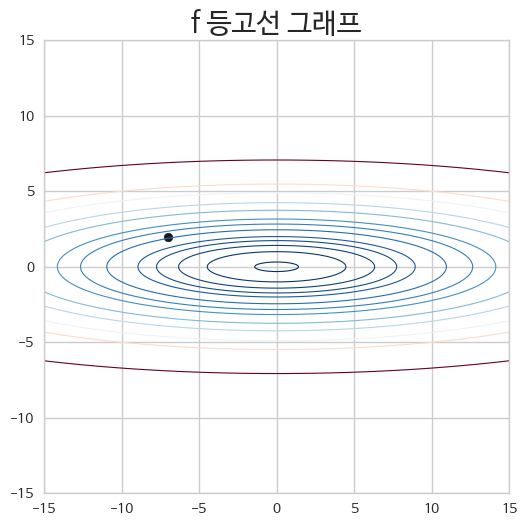

In [3]:
init = np.array([-7.0, 2.0])
xx = np.linspace(-15, 15, 600)
X, Y = np.meshgrid(xx, xx)
data = np.dstack((X, Y))
Z = f(X, Y)
levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24, 30, 50]
plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(init[0], init[1], c='k', s=40, edgecolors='k')
plt.contour(X, Y, Z, cmap='RdBu_r', levels=levels, linewidths=0.8)
plt.title('f 등고선 그래프', fontsize=20)
plt.show()

In [3]:
def params_init(x=-7.0, y=2.0):
    params = {}
    params['x'] = x
    params['y'] = y
    
    return params

In [4]:
from matplotlib import animation, rc
import matplotlib.pylab as plt
rc('animation', html='html5')

def draw_animation(his, n_epoch, interval, title):
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24, 30, 50]
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    scat = ax.scatter([], [], s=20, c='g', edgecolors='k')

    def ani_init():
        scat.set_offsets([])
        return scat,

    def ani_update(i):
        data = np.hstack((np.array(his['x'])[i, np.newaxis], np.array(his['y'])[i, np.newaxis]))
        scat.set_offsets(data)
        return scat,

    plt.contour(X, Y, Z, cmap='RdBu_r', levels=levels)
    plt.title(title, fontsize=20)
    plt.xlabel('x')
    plt.ylabel('y')
    anim = animation.FuncAnimation(fig, ani_update, init_func=ani_init,
                                   frames=n_epoch, interval=interval, blit=True)

    return anim

def draw_plot(his, title):
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    levels = [0.1, 1, 2, 3, 4, 6, 8, 10, 14, 18, 24, 30, 50]
    fig = plt.figure(figsize=(6, 6), dpi=100)
    
    plt.contour(X, Y, Z, cmap='RdBu_r', levels=levels)
    plt.plot(his['x'], his['y'], 'go-', markersize=5, linewidth=0.5)
    plt.title(title, fontsize=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#### SGD(확률적 경사 하강법)
$W \leftarrow W - \eta \dfrac{\partial L}{\partial W}$

In [5]:
class SGD(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        self.history_ = {'x':[], 'y':[]}
        
    def update(self, params, grads):
        
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            
            # for record
            self.history_[key].append(params[key])

In [5]:
def simulation(optimizer, n_epoch):
    params = params_init()
    grads = None
    optimizer.history_['x'].append(params['x'])
    optimizer.history_['y'].append(params['y'])
    
    for epoch in range(n_epoch):
        grads = f_prime(params['x'], params['y'], grads)  # calculate gradients
        optimizer.update(params, grads)

    return optimizer.history_

In [ ]:
N_EPOCH = 30
his = simulation(optimizer=SGD(lr=0.9), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='SGD(lr=0.9)')
anim

In [ ]:
draw_plot(his, title='SGD(lr=0.9)')

In [ ]:
anim.save('./figs/SGDanimation.gif', writer='imagemagick', fps=50)

SGD 장점:
* 좀 헤매긴 하지만, 그냥 GD 보다는 빠르다

SGD 단점: 
* learning rate에 따라서 global min을 찾지 못하고 local min에 갇힐 가능서 존재
* Oscilation(발진 현상): 해에 접근 할 수록 수렴 속도($\dfrac{\partial L}{\partial W}$)가 느려짐, 따라서 협곡 같은 모양에서 헤매는 경우 존재, 그렇다고 lr을 너무 높히면 발산 할 수도 있음(loss값이 커지는 현상)

#### Momentum
$v \leftarrow \gamma v - \eta \dfrac{\partial L}{\partial W}$

$W \leftarrow W + v$

In [10]:
class Momentum(object):
    def __init__(self, lr=0.01, gamma=0.9):
        """gamma: momentum term, how much momentum you want to give, default is 0.9"""
        self.lr = lr
        self.gamma = gamma
        self.v = None
        self.history_ = {'x':[], 'y':[]}
        
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.gamma * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
            
            # for record
            self.history_[key].append(params[key])

In [ ]:
N_EPOCH = 30
his = simulation(optimizer=Momentum(lr=0.9), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='Momentum(lr=0.9)')
anim

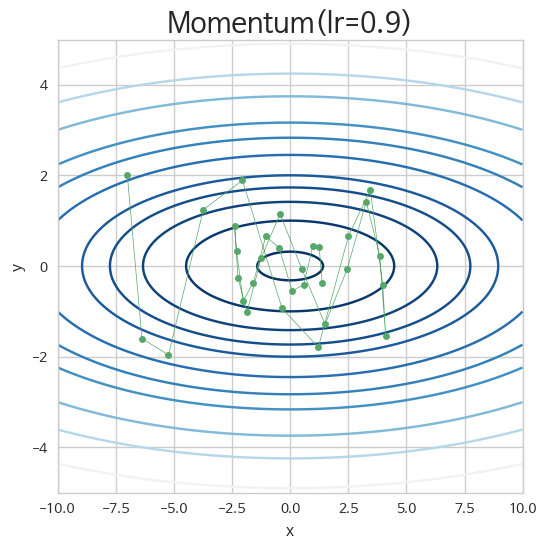

In [16]:
draw_plot(his, title='Momentum(lr=0.9)')

장점:
* 자주 이동하는 방향에 관성이 걸리게 되고, 진동을 하더라도 중앙으로 가는 방향에 힘을 얻기 때문에 SGD에 비해 상대적으로 빠르게 이동할 수 있다

그래도 가서 해메는 경우 존재

#### Nesterov Accelerated Gradient (NAG)
$v \leftarrow \gamma v - \eta \dfrac{\partial L(W-\gamma v)}{\partial W}$

$W \leftarrow W + v$

In [8]:
class NAG(object):
    def __init__(self, lr=0.01, gamma=0.9):
        """gamma: momentum term, how much momentum you want to give, default is 0.9"""
        self.lr = lr
        self.gamma = gamma
        self.v = None
        self.history_ = {'x':[], 'y':[]}
        
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.gamma * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
            
            # for record
            self.history_[key].append(params[key])

In [9]:
def simulation_NAG(optimizer, n_epoch):
    params = params_init()
    grads = None
    optimizer.history_['x'].append(params['x'])
    optimizer.history_['y'].append(params['y'])
    
    for epoch in range(n_epoch):
        x = params['x'] if epoch == 0 else params['x'] - optimizer.gamma*optimizer.v['x']
        y = params['y'] if epoch == 0 else params['y'] - optimizer.gamma*optimizer.v['y']
        grads = f_prime(x, y, grads)  # calculate gradients
        
        optimizer.update(params, grads)

    return optimizer.history_

In [ ]:
N_EPOCH = 30
his = simulation_NAG(optimizer=NAG(lr=0.07), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='NAG(lr=0.07)')
anim

In [ ]:
draw_plot(his, title='NAG(lr=0.07)')

수렴 안하고 발산해버림 ;

#### Adagrad
$h \leftarrow h + \dfrac{\partial L}{\partial W} \odot \dfrac{\partial L}{\partial W}$

$W \leftarrow W - \eta \dfrac{1}{\sqrt{h +\epsilon}} \dfrac{\partial L}{\partial W}$

In [10]:
class Adagrad(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        self.epsilon = 1e-6  # 0으로 나누눈 것을 방지
        self.history_ = {'x':[], 'y':[]}
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / np.sqrt(self.h[key] + self.epsilon) 
            
            # for record
            self.history_[key].append(params[key])

In [ ]:
N_EPOCH = 30
his = simulation(optimizer=Adagrad(lr=1.5), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='Adagrad(lr=1.5)')
anim

In [ ]:
draw_plot(his, title='Adagrad(lr=1.5)')

특징:
* 학습률 값을 조정(SGD에서 너무 작으면 학습 시간이 길어지고, 반대로 너무 크면 발산하여 학습이 이루어 지지 않음), learning rate decay, 적응적으로(adaptive) 학습률을 조정하면서 진행
* h: 학습률 조정을 위한 파라미터, 제곱을 해주기 때문에 크게 갱신된 파라미터는 W로 들어가는 과정에서 분모로 들어가 학습률이 낮아지게 조정한다.
    
단점: 
* 과거의 기울기 값을 계속 곱해서 더해가기 때문에, 학습을 진행 할 수록 갱신 강도가 작아져 0에 가까이 되면 underflow 발생하여 업데이트가 안됨
* 개선방법: RMSProp(지수이동 평균 방법)

#### RMSProp
$G \leftarrow \gamma G + (1-\gamma)(\dfrac{\partial L}{\partial W} \odot \dfrac{\partial L}{\partial W})$

$W \leftarrow W - \eta \dfrac{1}{\sqrt{G + \epsilon}} \dfrac{\partial L}{\partial W}$

In [17]:
class RMSProp(object):
    def __init__(self, lr=0.01, gamma=0.9):
        """G는 이동평균의 개념으로 과거 1보다 작은 gamma값을 곱해서 서서히 잊게 하고 새로운 값을 조금씩 더 해준다."""
        self.lr = lr
        self.gamma = gamma  # decay term
        self.G = None
        self.epsilon = 1e-6  # 0으로 나누눈 것을 방지
        self.history_ = {'x':[], 'y':[]}
        
    def update(self, params, grads):
        if self.G is None:
            self.G = {}
            for key, val in params.items():
                self.G[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.G[key] += self.gamma * self.G[key] + (1 - self.gamma) * (grads[key] * grads[key])
            params[key] -= self.lr * grads[key] / np.sqrt(self.G[key] + self.epsilon) 
            
            # for record
            self.history_[key].append(params[key])

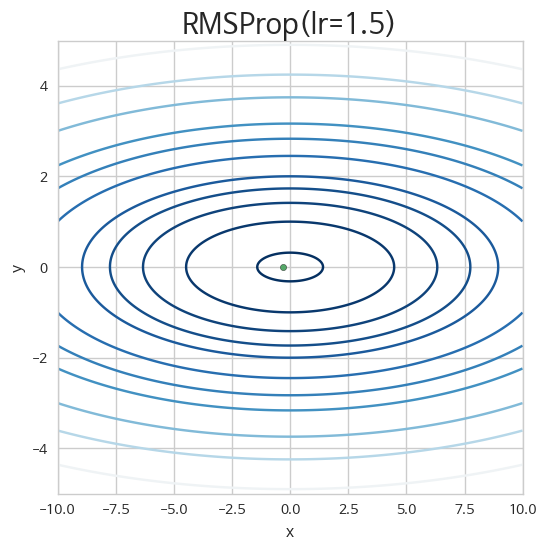

In [18]:
N_EPOCH = 30
his = simulation(optimizer=RMSProp(lr=1.5), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='RMSProp(lr=1.5)')
anim

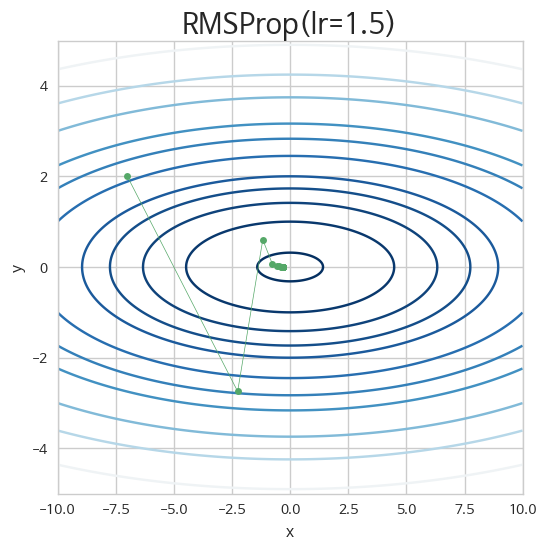

In [19]:
draw_plot(his, title='RMSProp(lr=1.5)')

#### AdaDelta
$G \leftarrow \gamma G + (1-\gamma)(\dfrac{\partial L}{\partial W} \odot \dfrac{\partial L}{\partial W})$

$\Delta_{W} = \dfrac{\sqrt{s+\epsilon}}{\sqrt{G+\epsilon}} \dfrac{\partial L}{\partial W}$

$W \leftarrow W - \Delta_{W}$

$s \leftarrow \gamma s + (1-\gamma){\Delta_{W}}^2$

In [12]:
class AdaDelta(object):
    def __init__(self, gamma=0.9):
        """
        https://arxiv.org/pdf/1212.5701
        """
        self.gamma = gamma  # decay term
        self.G = None  # accumulated gradients
        self.s = None  # accumulated updates
        self.del_W = None
        self.epsilon = 1e-6  # 0으로 나누눈 것을 방지
        self.iter = 0
        self.history_ = {'x':[], 'y':[]}
        
    def update(self, params, grads):
        if (self.G is None) | (self.s is None) | (self.del_W is None):
            # Initialize accumulation variables
            self.G = {}
            self.s = {}  
            self.del_W = {}
            for key, val in params.items():
                self.G[key] = np.zeros_like(val)
                self.s[key] = np.zeros_like(val)
                self.del_W[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.G[key] += self.gamma * self.G[key] + (1 - self.gamma) * (grads[key] * grads[key])
            self.del_W[key] = -(np.sqrt(self.s[key] + self.epsilon) / np.sqrt(self.G[key] + self.epsilon)) * grads[key]
            self.s[key] += self.gamma * self.s[key] + (1 - self.gamma) * self.del_W[key]**2
            params[key] += self.del_W[key]
            
            # for record
            self.history_[key].append(params[key])

In [ ]:
N_EPOCH = 30
his = simulation(optimizer=AdaDelta(), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='AdaDelta')
anim

In [ ]:
draw_plot(his, title='AdaDelta')

#### Adam(Adaptive Moment Estimation)
Adam (Adaptive Moment Estimation)은 RMSProp과 Momentum 방식을 합친 것 같은 알고리즘이다.

$m \leftarrow \beta_1 m + (1 - \beta_1) \dfrac{\partial L}{\partial W}$

$v \leftarrow \beta_2 v + (1 - \beta_2)(\dfrac{\partial L}{\partial W} \odot \dfrac{\partial L}{\partial W})$

다만, Adam에서는 m과 v가 처음에 0으로 초기화되어 있기 때문에 학습의 초반부에서는 m,v가 0에 가깝게 bias 되어있을 것이라고 판단하여 이를 unbiased 하게 만들어주는 작업을 거친다. m 와 v의 식을 ∑ 형태로 펼친 후 양변에 expectation을 씌워서 정리해보면, 다음과 같은 보정을 통해 unbiased 된 expectation을 얻을 수 있다. 

$\hat{m} = \dfrac{m}{1-\beta_1}$

$\hat{v} = \dfrac{v}{1-\beta_2}$

$W \leftarrow W - \dfrac{\eta}{\hat{v} + \epsilon} \hat{m}$


Require: α: Stepsize

Require: β1, β2 ∈ [0, 1): Exponential decay rates for the moment estimates

Require: f(θ): Stochastic objective function with parameters θ

Require: θ0: Initial parameter vector

m0 ← 0 (Initialize 1st moment vector)

v0 ← 0 (Initialize 2nd moment vector)

t ← 0 (Initialize timestep)

while θt not converged do

    t ← t + 1
    
    αt = α · \dfrac{\sqrt{1-beta_2^t}}{1-beta_1^t}

    gt ← ∇θft(θt−1) (Get gradients w.r.t. stochastic objective at timestep t)

    mt ← β1 · mt−1 + (1 − β1) · gt (Update biased first moment estimate)

    vt ← β2 · vt−1 + (1 − β2) · gt^2 (Update biased second raw moment estimate)

    hat{m}t ← mt/(1 − β_1^t) (Compute bias-corrected first moment estimate)

    hat{v}t ← vt/(1 − β_2^t) (Compute bias-corrected second raw moment estimate)

    θt ← θt−1 − α · hat{m}t/(sqrt(hat{v}t) + epsilon) (Update parameters)
    
end while
return θt (Resulting parameters)

효율적으로 만들기 위해서 논문 좀 참조해야함

In [6]:
class Adam(object):
    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.unbias_m = None
        self.v = None
        self.unbias_v = None
        self.history_ = {'x':[], 'y':[]}
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
#         lr_t = self.lr * np.sqrt(1.0 - self.beta2 ** self.iter) / (1.0 - self.beta1 ** self.iter)

        for key in params.keys():
            self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)

            self.unbias_m = self.m[key] / (1 - self.beta1**self.iter) # correct bias
            self.unbias_v = self.v[key] / (1 - self.beta2**self.iter) # correct bias
            params[key] -= self.lr * self.unbias_m / (np.sqrt(self.unbias_v) + 1e-7)
            
            # for record
            self.history_[key].append(params[key])

In [23]:
class Adam(object):
    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        self.history_ = {'x':[], 'y':[]}
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2 ** self.iter) / (1.0 - self.beta1 ** self.iter)

        for key in params.keys():
            # self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            # self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key] ** 2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

            # unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            # unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            # params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)
            
            # for record
            self.history_[key].append(params[key])

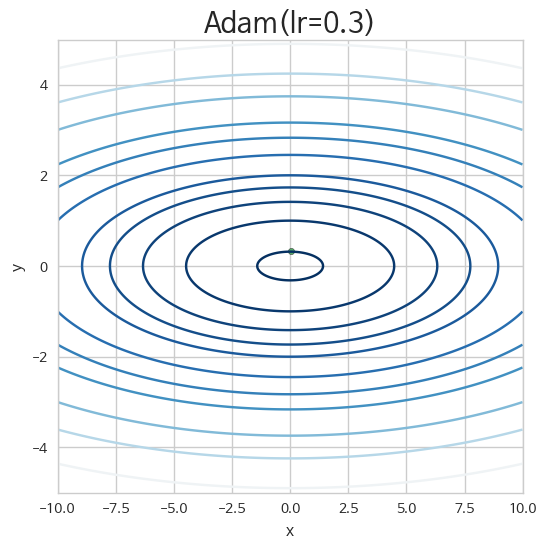

In [7]:
N_EPOCH = 30
his = simulation(optimizer=Adam(lr=0.3), n_epoch=N_EPOCH)
anim = draw_animation(his, N_EPOCH, interval=100, title='Adam(lr=0.3)')
anim

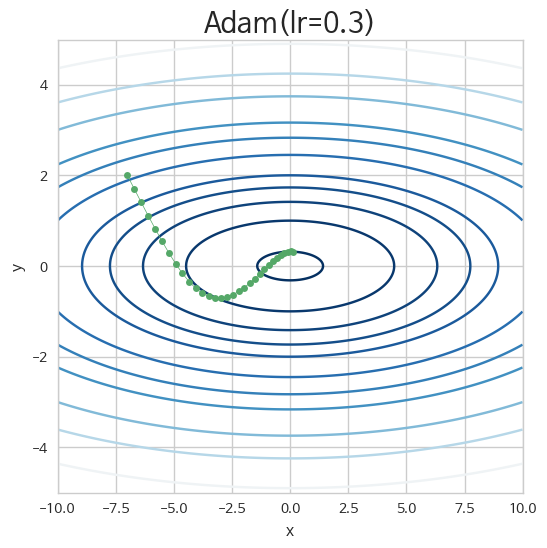

In [28]:
draw_plot(his, title='Adam(lr=0.3)')